This is how much space the figure will take up on letter paper


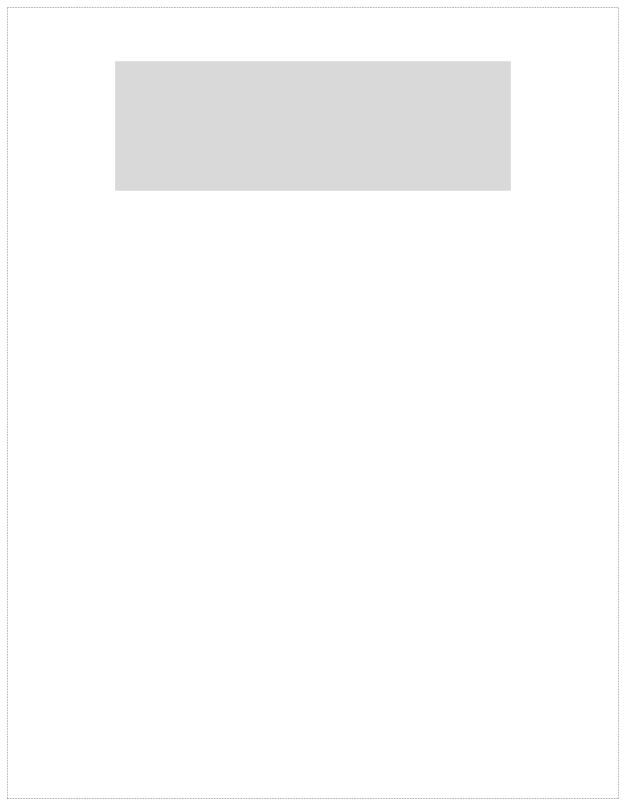

In [1]:
__PRODUCTION__ = 0
__NAME__       = 'optimization1'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.8

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

In [2]:
import functools
import numpy as np
import colorsys
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import json
import pickle

from symfac.experimental import RBFExpansionV2

In [3]:
x_0,y_0,name0 = pickle.loads(open('data/over-optimization-methods-SGD.pickle', 'rb').read())
x_1,y_1,name1 = pickle.loads(open('data/over-optimization-methods-Adam.pickle', 'rb').read())
x_2,y_2,name2 = pickle.loads(open('data/over-optimization-methods-Adadelta.pickle', 'rb').read())
x_3,y_3,name3 = pickle.loads(open('data/over-optimization-methods-Adagrad.pickle', 'rb').read())
x_4,y_4,name4 = pickle.loads(open('data/over-optimization-methods-RMSprop.pickle', 'rb').read())
x_5,y_5,name5 = pickle.loads(open('data/over-optimization-methods-AdamW.pickle', 'rb').read())
x_6,y_6,name6 = pickle.loads(open('data/over-optimization-methods-ASGD.pickle', 'rb').read())

In [4]:
x_20,y_20,name20 = pickle.loads(open('data/optimization-methods-SGD.pickle', 'rb').read())
x_21,y_21,name21 = pickle.loads(open('data/optimization-methods-Adam.pickle', 'rb').read())
x_22,y_22,name22 = pickle.loads(open('data/optimization-methods-Adadelta.pickle', 'rb').read())
x_23,y_23,name23 = pickle.loads(open('data/optimization-methods-Adagrad', 'rb').read())
x_24,y_24,name24 = pickle.loads(open('data/optimization-methods-RMSprop.pickle', 'rb').read())
x_25,y_25,name25 = pickle.loads(open('data/optimization-methods-AdamW.pickle', 'rb').read())
x_26,y_26,name26 = pickle.loads(open('data/optimization-methods-ASGD.pickle', 'rb').read())

In [5]:
hist_21, hist_210 = pickle.loads(open('data/hist_starts_2.pickle', 'rb').read())
hist_41, hist_410 = pickle.loads(open('data/hist_starts_4.pickle', 'rb').read())

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


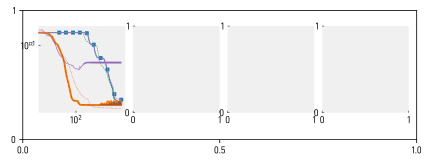

In [22]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__), dpi=300))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.04
dx = 0.24
w = 0.22
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.12,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]


def draw_bars(ax, h, offset, **kwargs):
    ax.bar(np.arange(len(h)) + offset, h, **kwargs)

bar_width = 0.4
bar_style = dict(
    width = 0.5*bar_width
)
svd_style = dict(
    color='r',
    label=r'\textbf{SVD}'
)
rbf_style = dict(
    color='k',
    label=r'\textbf{RBF}'
)
srbf_style = dict(
    color='g',
    label=r'\textbf{SRBF}'
)


axs[0].plot(x_20, y_20, lw = 1)
axs[0].plot(x_21,y_21, '-',lw = 2)
axs[0].plot( x_22,y_22, '--')
axs[0].plot(x_23,y_23,':')
axs[0].plot( x_24,y_24,)
axs[0].plot( x_25,y_25, '-.')
axs[0].plot( x_26, y_26, lw=0.5)

x_26 = np.array(x_26)
y_26 = np.array(y_26)

marker_indices = np.logspace(1, np.log10(len(x_26)), 10).astype(np.int).tolist()

axs[0].scatter(x_26[marker_indices], y_26[marker_indices], marker='s', s=0.5)

# axs[1].plot(x_0, y_0, lw = 1)
# axs[1].plot(x_1,y_1, '-',lw = 2)
# axs[1].plot( x_2,y_2, '--')
# axs[1].plot(x_3,y_3,':')
# axs[1].plot( x_4,y_4,)
# axs[1].plot( x_5,y_5, '-.')
# axs[1].plot( x_6,y_6, ',')



axs[0].set_xscale('log') 
axs[0].set_yscale('log') 
# axs[0].legend(('SGD', 'Adam', 'Adadelta', 'Adagrad', 'RMSprop', 'AdamW', 'ASGD'),
#            loc='lower left', fontsize=6)
# axs[1].set_xscale('log') 
# axs[1].set_yscale('log') 
# axs[1].legend(('SGD', 'Adam', 'Adadelta', 'Adagrad', 'RMSprop', 'AdamW', 'ASGD'),
#            loc='lower left', fontsize=6)

# HIST_BINS = np.linspace(0, 0.15, 50)
# axs[2].hist(hist_21, HIST_BINS, alpha = 0.5, color='g', label='1')
# axs[2].hist(hist_210, HIST_BINS, alpha = 0.5, color='b', label='1/10')
# axs[2].legend(loc="upper right", fontsize=6)


# axs[3].hist(hist_41, HIST_BINS, alpha = 0.5, color='g', label='1')
# axs[3].hist(hist_410, HIST_BINS, alpha = 0.5, color='b', label='1/10')
# axs[3].legend(loc="upper right", fontsize=6)


# title_style = dict(
#     fontsize=8,
#     y=0.975,
#     va='bottom'
# )

# tick_style = dict(
#     fontsize=7,
# )
# label_style = dict(
#     fontsize=8,
#     labelpad=0.75,
# )

# axs[0].set_title(r'2 components', **title_style)
# axs[1].set_title(r'4 components', **title_style)
# axs[2].set_title(r'2 components', **title_style)
# axs[3].set_title(r'4 components', **title_style)




if __PRODUCTION__:
   fig.savefig(f'pgf/{__NAME__}.pgf', dpi=300)
else:
   fig.savefig(f'svg/{__NAME__}.svg', dpi=300)
# plt.show()

In [20]:
np.logspace(1, np.log10(len(x_26)), 10).astype(np.int).tolist()

[10, 25, 66, 170, 440, 1134, 2924, 7533, 19407, 49999]

In [7]:
!make -f Makefile.figures fig-"$__NAME__".pdf 2>&1 | tail -n 1

make: 'fig-optimization1.pdf' is up to date.


END
---